# moons - non linear dataset 

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.manifold import TSNE

In [96]:
np.random.seed(42)

In [97]:
X,y = make_moons(n_samples=10000,noise=0.1,random_state=42)

num_extra_features = 8
extra_features = np.random.normal(scale=0.1,size=(X.shape[0],num_extra_features))  
X_extended = np.hstack((X,extra_features))

df_moons = pd.DataFrame(X_extended,columns=[f"vab_{i+1}" for i in range(X_extended.shape[1])])
df_moons["target"] = y

In [98]:
df_moons

,vab_1,vab_2,vab_3,vab_4,vab_5,vab_6,vab_7,vab_8,vab_9,vab_10,target
0,0.455493,-0.125503,0.049671,-0.013826,0.064769,0.152303,-0.023415,-0.023414,0.157921,0.076743,1
1,-0.704217,0.041308,-0.046947,0.054256,-0.046342,-0.046573,0.024196,-0.191328,-0.172492,-0.056229,0
2,0.413799,0.791322,-0.101283,0.031425,-0.090802,-0.141230,0.146565,-0.022578,0.006753,-0.142475,0
3,-0.864049,0.138754,-0.054438,0.011092,-0.115099,0.037570,-0.060064,-0.029169,-0.060171,0.185228,0
4,-0.936268,0.359267,-0.001350,-0.105771,0.082254,-0.122084,0.020886,-0.195967,-0.132819,0.019686,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.179911,0.138552,-0.127570,0.179582,0.036738,-0.027876,-0.025167,0.027819,0.200274,0.154656,1
9996,0.052471,0.474023,-0.026886,0.009416,0.014441,-0.195183,-0.023042,0.021013,-0.090781,0.172708,1
9997,-0.038031,0.245408,-0.112582,-0.101525,0.069162,0.027878,-0.045237,0.100722,0.024377,0.184915,1
9998,0.869802,0.523295,-0.177846,-0.052173,0.165432,0.048045,-0.010525,-0.040348,0.034982,-0.114482,0


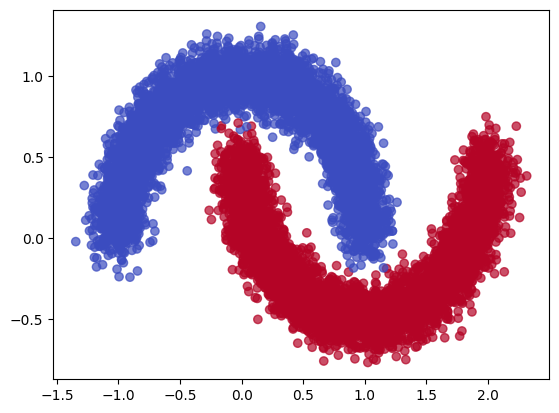

In [99]:
plt.scatter(df_moons.iloc[:,0],df_moons.iloc[:, 1],c=y,cmap='coolwarm',alpha=0.7)
plt.show()

In [100]:
df_moons

,vab_1,vab_2,vab_3,vab_4,vab_5,vab_6,vab_7,vab_8,vab_9,vab_10,target
0,0.455493,-0.125503,0.049671,-0.013826,0.064769,0.152303,-0.023415,-0.023414,0.157921,0.076743,1
1,-0.704217,0.041308,-0.046947,0.054256,-0.046342,-0.046573,0.024196,-0.191328,-0.172492,-0.056229,0
2,0.413799,0.791322,-0.101283,0.031425,-0.090802,-0.141230,0.146565,-0.022578,0.006753,-0.142475,0
3,-0.864049,0.138754,-0.054438,0.011092,-0.115099,0.037570,-0.060064,-0.029169,-0.060171,0.185228,0
4,-0.936268,0.359267,-0.001350,-0.105771,0.082254,-0.122084,0.020886,-0.195967,-0.132819,0.019686,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.179911,0.138552,-0.127570,0.179582,0.036738,-0.027876,-0.025167,0.027819,0.200274,0.154656,1
9996,0.052471,0.474023,-0.026886,0.009416,0.014441,-0.195183,-0.023042,0.021013,-0.090781,0.172708,1
9997,-0.038031,0.245408,-0.112582,-0.101525,0.069162,0.027878,-0.045237,0.100722,0.024377,0.184915,1
9998,0.869802,0.523295,-0.177846,-0.052173,0.165432,0.048045,-0.010525,-0.040348,0.034982,-0.114482,0


### correlation matrix

In [101]:
df_moons.iloc[:,:-1].corr()

,vab_1,vab_2,vab_3,vab_4,vab_5,vab_6,vab_7,vab_8,vab_9,vab_10
vab_1,1.000000,-0.436503,-0.012499,0.006713,-0.009496,-0.004349,-0.008590,0.003696,0.002889,-0.009859
vab_2,-0.436503,1.000000,0.003959,-0.000407,0.007181,-0.008910,0.016560,-0.011372,0.009314,0.004820
vab_3,-0.012499,0.003959,1.000000,-0.002950,0.001872,-0.020226,-0.004977,0.017171,-0.000396,-0.004565
vab_4,0.006713,-0.000407,-0.002950,1.000000,0.000720,0.001915,0.000832,-0.005397,0.003599,-0.006094
vab_5,-0.009496,0.007181,0.001872,0.000720,1.000000,0.000667,-0.008944,0.004178,0.005085,-0.008019
vab_6,-0.004349,-0.008910,-0.020226,0.001915,0.000667,1.000000,-0.010911,-0.000988,0.007568,0.006202
vab_7,-0.008590,0.016560,-0.004977,0.000832,-0.008944,-0.010911,1.000000,0.010798,-0.009949,0.000721
vab_8,0.003696,-0.011372,0.017171,-0.005397,0.004178,-0.000988,0.010798,1.000000,0.019187,0.007533
vab_9,0.002889,0.009314,-0.000396,0.003599,0.005085,0.007568,-0.009949,0.019187,1.000000,-0.016231
vab_10,-0.009859,0.004820,-0.004565,-0.006094,-0.008019,0.006202,0.000721,0.007533,-0.016231,1.000000


<Axes: >

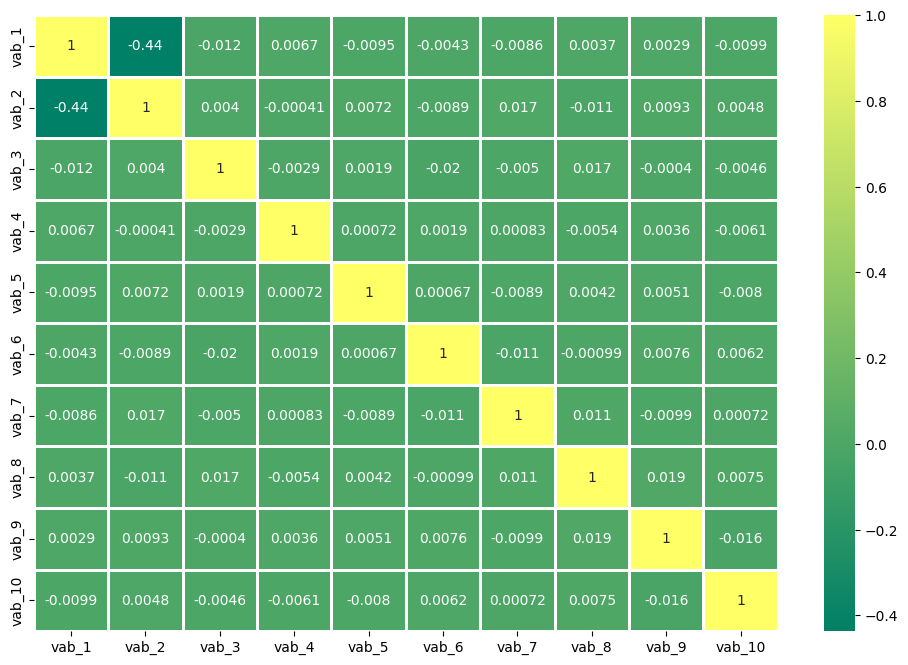

In [102]:
plt.figure(figsize=(12,8))
sns.heatmap(df_moons.iloc[:,:-1].corr(),cmap='summer',annot=True,linecolor='white',linewidths=1)

### data standardization

In [103]:
X_values = df_moons.iloc[:,:-1].values

In [104]:
y_values = df_moons.iloc[:,-1].values

In [105]:
from sklearn.preprocessing import StandardScaler

In [106]:
scaler = StandardScaler()

In [107]:
X_values = scaler.fit_transform(X_values)

In [108]:
np.mean(X_values),np.std(X_values)

(7.091216502885799e-17, 0.9999999999999998)

In [109]:
pd.DataFrame(X_values)

,0,1,2,3,4,5,6,7,8,9
0,-0.052391,-0.745451,0.487814,-0.131574,0.640246,1.521430,-0.239134,-0.232601,1.568335,0.770058
1,-1.383186,-0.413818,-0.477995,0.551327,-0.451988,-0.465752,0.236235,-1.920356,-1.730566,-0.564645
2,-0.100236,1.077265,-1.021138,0.322318,-0.889042,-1.411575,1.458002,-0.224198,0.059043,-1.430336
3,-1.566596,-0.220089,-0.552874,0.118373,-1.127885,0.375008,-0.605045,-0.290453,-0.609132,1.858965
4,-1.649469,0.218309,-0.022197,-1.053824,0.812132,-1.220267,0.203188,-1.966983,-1.334462,0.197348
...,...,...,...,...,...,...,...,...,...,...
9995,-0.368628,-0.220491,-1.283899,1.808412,0.364697,-0.278931,-0.256623,0.282351,1.991192,1.552106
9996,-0.514868,0.446451,-0.277458,0.101558,0.145516,-1.950678,-0.235408,0.213941,-0.914748,1.733294
9997,-0.618722,-0.008052,-1.134086,-1.011232,0.683428,0.278168,-0.457010,1.015120,0.235005,1.855828
9998,0.423039,0.544407,-1.786461,-0.516207,1.629779,0.479674,-0.110432,-0.402815,0.340891,-1.149355


<Axes: ylabel='Density'>

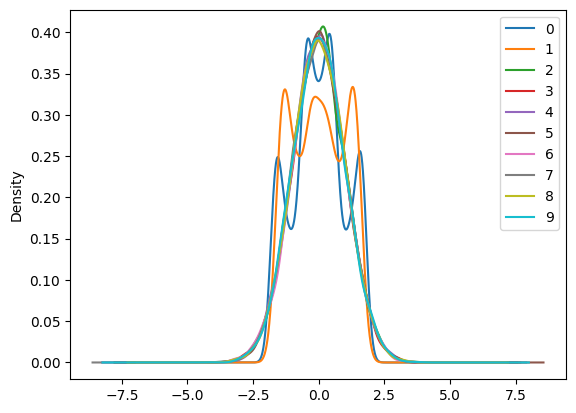

In [110]:
pd.DataFrame(X_values).plot(kind='density')

## pca application

In [111]:
from sklearn.decomposition import PCA

In [112]:
pca_general = PCA()

In [113]:
pca_general.fit(X_values)

PCA()

In [114]:
explained_variance = pca_general.explained_variance_ratio_

In [115]:
explained_variance

array([0.1438383 , 0.10315667, 0.10275127, 0.10132595, 0.1005837 ,
       0.09937936, 0.09932553, 0.09750688, 0.09585136, 0.05628097])

In [116]:
eigenvalues = pca_general.explained_variance_

In [117]:
pd.DataFrame(eigenvalues)

,0
0,1.438527
1,1.031670
2,1.027615
3,1.013361
4,1.005938
5,0.993893
6,0.993355
7,0.975166
8,0.958609
9,0.562866


In [118]:
eigenvectors = pca_general.components_

### scree plot

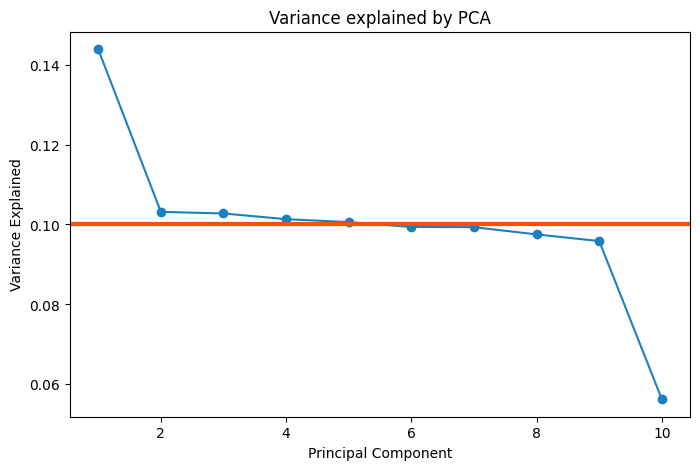

In [119]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='#1B80BF')
plt.axhline(y=0.1, color='#FC4E07', linewidth=3)
plt.title('Variance explained by PCA')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [120]:
pca = PCA(n_components=2)

In [121]:
principal_components = pca.fit_transform(X_values)

In [122]:
pd.DataFrame(principal_components).head(8)

,0,1
0,-0.447639,0.253529
1,0.681775,-1.850940
2,0.821601,-0.034273
3,0.921433,-1.630597
4,1.404924,-1.059700
5,-0.535734,-0.413115
6,-0.332595,0.977167
7,0.516218,-0.915921


In [123]:
principal_df = pd.DataFrame(data=principal_components,columns=['principal component 1','principal component 2'])

In [124]:
final_df = pd.concat([principal_df,df_moons[['target']]],axis=1)

In [125]:
final_df

,principal component 1,principal component 2,target
0,-0.447639,0.253529,1
1,0.681775,-1.850940,0
2,0.821601,-0.034273,0
3,0.921433,-1.630597,0
4,1.404924,-1.059700,0
...,...,...,...
9995,0.096618,-0.079998,1
9996,0.709302,-0.258128,1
9997,0.432369,-0.378608,1
9998,0.064581,-0.479022,0


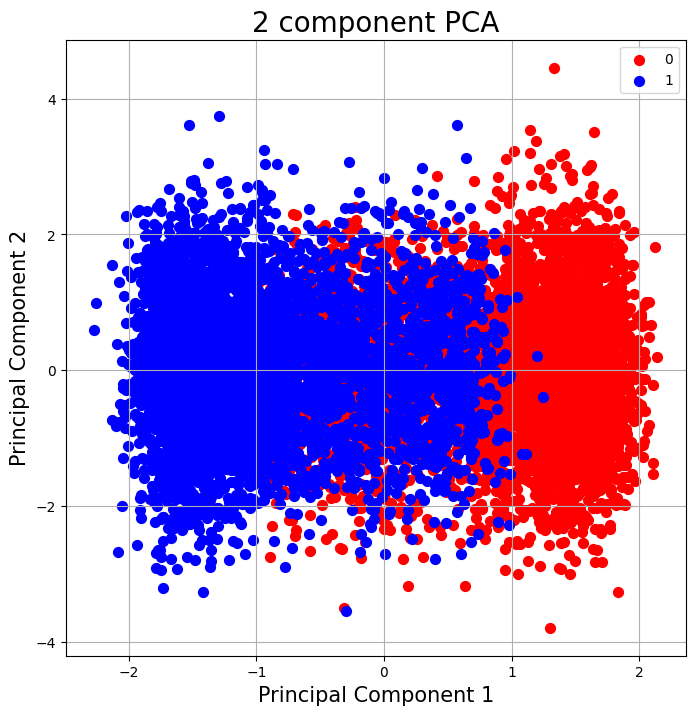

In [126]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1',fontsize = 15)
ax.set_ylabel('Principal Component 2',fontsize = 15)
ax.set_title('2 component PCA',fontsize = 20)

targets = [0,1]
colors = ['r','b']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               ,final_df.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(targets)
ax.grid()

### biplot

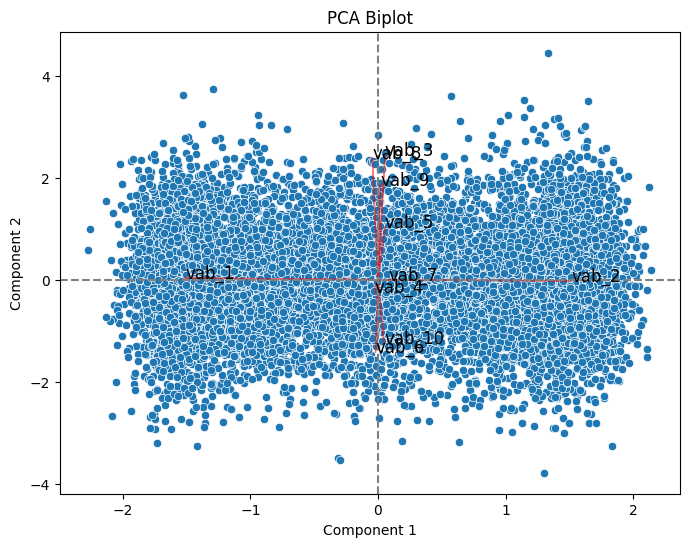

In [127]:
scores = pca.transform(X_values)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scores[:, 0], y=scores[:, 1])
for i, col in enumerate(df_moons.iloc[:,:-1].columns):
    plt.arrow(0, 0, eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), color='r', alpha=0.5)
    plt.text(eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), col, fontsize=12)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA Biplot')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

### loading plot

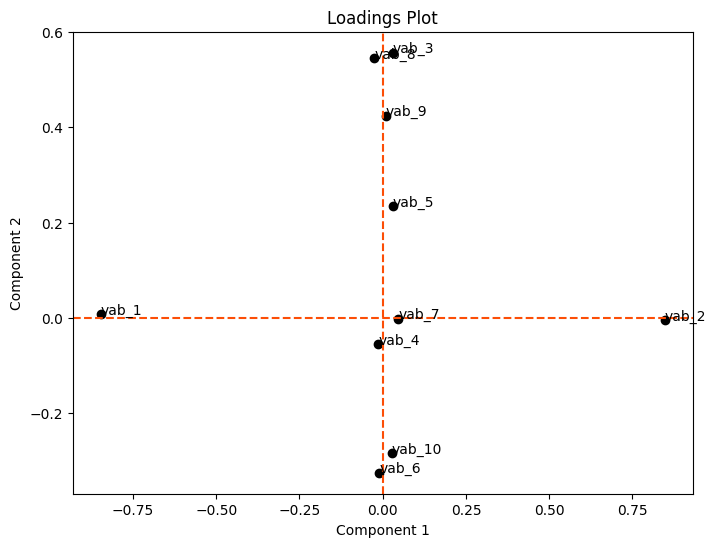

In [128]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
plt.figure(figsize=(8, 6))
plt.scatter(loadings[:, 0], loadings[:, 1], color='black')
for i, txt in enumerate(df_moons.iloc[:,:-1].columns):
    plt.text(loadings[i, 0], loadings[i, 1], txt, fontsize=10)
plt.axhline(0, color='#FC4E07', linestyle='--')
plt.axvline(0, color='#FC4E07', linestyle='--')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Loadings Plot')
plt.show()

### scores

In [129]:
scores_pca = pca.transform(X_values)

In [130]:
pd.DataFrame(scores_pca).head()

,0,1
0,-0.447639,0.253529
1,0.681775,-1.850940
2,0.821601,-0.034273
3,0.921433,-1.630597
4,1.404924,-1.059700


## t-SNE

In [131]:
tsne = TSNE(n_components=2,random_state=42)

In [132]:
X_tsne = tsne.fit_transform(X_values)

In [133]:
tsne_data = np.vstack((X_tsne.T,df_moons['target'])).T

In [134]:
tsne_df = pd.DataFrame(data=tsne_data,columns=('dim_1','dim_2','target'))

In [135]:
tsne_df

,dim_1,dim_2,target
0,-9.782095,-5.625478,1.0
1,52.743507,-32.557629,0.0
2,34.101139,-0.687504,0.0
3,58.189507,-7.811169,0.0
4,66.800468,-9.360106,0.0
...,...,...,...
9995,5.605924,32.643970,1.0
9996,11.949997,-19.690569,1.0
9997,53.843956,-19.979685,1.0
9998,19.981737,-26.255447,0.0


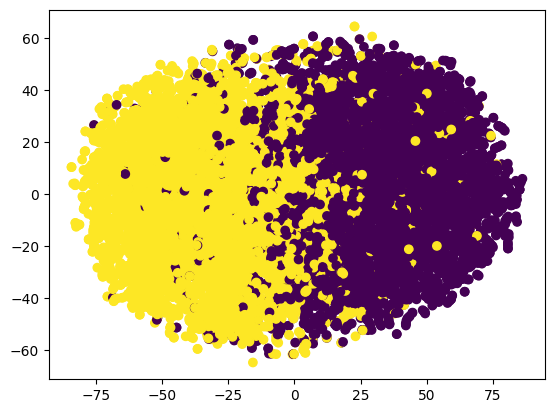

In [136]:
plt.scatter(x=tsne_df['dim_1'],y=tsne_df['dim_2'],c=tsne_df['target'])
plt.show()

In [137]:
tsne.kl_divergence_

3.2270143032073975

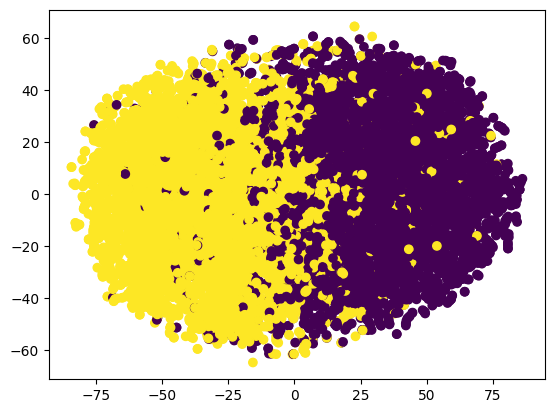

In [138]:
plt.scatter(x=X_tsne[:,0],y=X_tsne[:,1],c=y)
plt.show()

## clustering 

In [139]:
from sklearn.cluster import KMeans

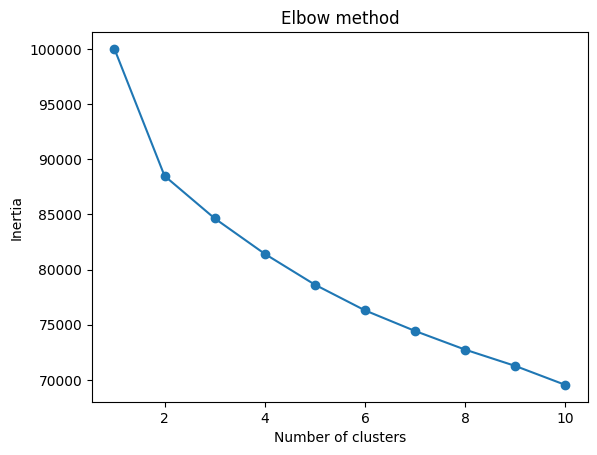

In [140]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_values)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [141]:
kmeans = KMeans(n_clusters=2,init='k-means++')

In [142]:
kmeans.fit(X_values)

KMeans(n_clusters=2)

In [143]:
df_moons['k_means'] = kmeans.labels_

In [144]:
df_moons

,vab_1,vab_2,vab_3,vab_4,vab_5,vab_6,vab_7,vab_8,vab_9,vab_10,target,k_means
0,0.455493,-0.125503,0.049671,-0.013826,0.064769,0.152303,-0.023415,-0.023414,0.157921,0.076743,1,0
1,-0.704217,0.041308,-0.046947,0.054256,-0.046342,-0.046573,0.024196,-0.191328,-0.172492,-0.056229,0,1
2,0.413799,0.791322,-0.101283,0.031425,-0.090802,-0.141230,0.146565,-0.022578,0.006753,-0.142475,0,1
3,-0.864049,0.138754,-0.054438,0.011092,-0.115099,0.037570,-0.060064,-0.029169,-0.060171,0.185228,0,1
4,-0.936268,0.359267,-0.001350,-0.105771,0.082254,-0.122084,0.020886,-0.195967,-0.132819,0.019686,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.179911,0.138552,-0.127570,0.179582,0.036738,-0.027876,-0.025167,0.027819,0.200274,0.154656,1,1
9996,0.052471,0.474023,-0.026886,0.009416,0.014441,-0.195183,-0.023042,0.021013,-0.090781,0.172708,1,1
9997,-0.038031,0.245408,-0.112582,-0.101525,0.069162,0.027878,-0.045237,0.100722,0.024377,0.184915,1,1
9998,0.869802,0.523295,-0.177846,-0.052173,0.165432,0.048045,-0.010525,-0.040348,0.034982,-0.114482,0,1


In [145]:
from scipy.optimize import linear_sum_assignment

y_true = df_moons['target'].values  
y_kmeans = df_moons['k_means'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_moons['k_means'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_moons['k_means'] == y_true))

accuracy before: 0.1488
accuracy after: 0.8512


In [146]:
df_moons

,vab_1,vab_2,vab_3,vab_4,vab_5,vab_6,vab_7,vab_8,vab_9,vab_10,target,k_means
0,0.455493,-0.125503,0.049671,-0.013826,0.064769,0.152303,-0.023415,-0.023414,0.157921,0.076743,1,1
1,-0.704217,0.041308,-0.046947,0.054256,-0.046342,-0.046573,0.024196,-0.191328,-0.172492,-0.056229,0,0
2,0.413799,0.791322,-0.101283,0.031425,-0.090802,-0.141230,0.146565,-0.022578,0.006753,-0.142475,0,0
3,-0.864049,0.138754,-0.054438,0.011092,-0.115099,0.037570,-0.060064,-0.029169,-0.060171,0.185228,0,0
4,-0.936268,0.359267,-0.001350,-0.105771,0.082254,-0.122084,0.020886,-0.195967,-0.132819,0.019686,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.179911,0.138552,-0.127570,0.179582,0.036738,-0.027876,-0.025167,0.027819,0.200274,0.154656,1,0
9996,0.052471,0.474023,-0.026886,0.009416,0.014441,-0.195183,-0.023042,0.021013,-0.090781,0.172708,1,0
9997,-0.038031,0.245408,-0.112582,-0.101525,0.069162,0.027878,-0.045237,0.100722,0.024377,0.184915,1,0
9998,0.869802,0.523295,-0.177846,-0.052173,0.165432,0.048045,-0.010525,-0.040348,0.034982,-0.114482,0,0


In [147]:
print(np.unique(df_moons['target']))

[0 1]


In [148]:
print(np.unique(kmeans.labels_))

[0 1]


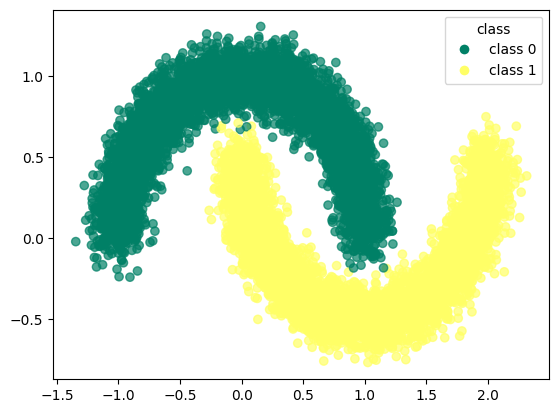

In [149]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_moons.iloc[:, 0], df_moons.iloc[:, 1], 
                      c=df_moons['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_moons['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                        for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

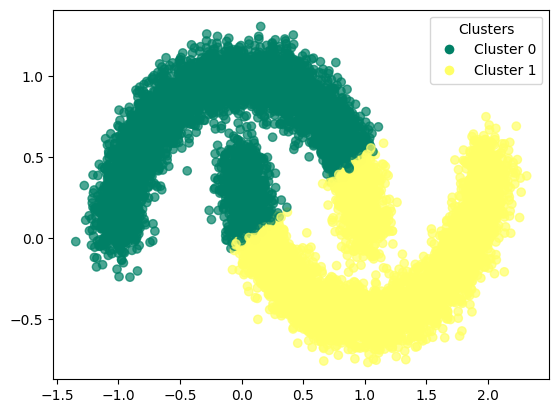

In [150]:
scatter = plt.scatter(df_moons.iloc[:, 0], df_moons.iloc[:, 1], 
                      c=df_moons['k_means'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_moons['k_means'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [151]:
kmeans.cluster_centers_

array([[ 0.73268083, -0.78337327, -0.01205156,  0.01273023, -0.01338401,
         0.00896793, -0.01919184,  0.00440109, -0.00470961, -0.01968816],
       [-0.73238781,  0.78305998,  0.01204674, -0.01272514,  0.01337866,
        -0.00896435,  0.01918417, -0.00439933,  0.00470773,  0.01968028]])

In [152]:
print(confusion_matrix(df_moons['target'],df_moons['k_means']))

[[4256  744]
 [ 744 4256]]


In [153]:
print(classification_report(df_moons['target'],df_moons['k_means']))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      5000
           1       0.85      0.85      0.85      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



### clustering with pca

In [154]:
WCSS = []

for i in range(1,30):
  kmeans_pca = KMeans(n_clusters = i, init = "k-means++")
  kmeans_pca.fit(scores_pca)
  WCSS.append(kmeans_pca.inertia_)

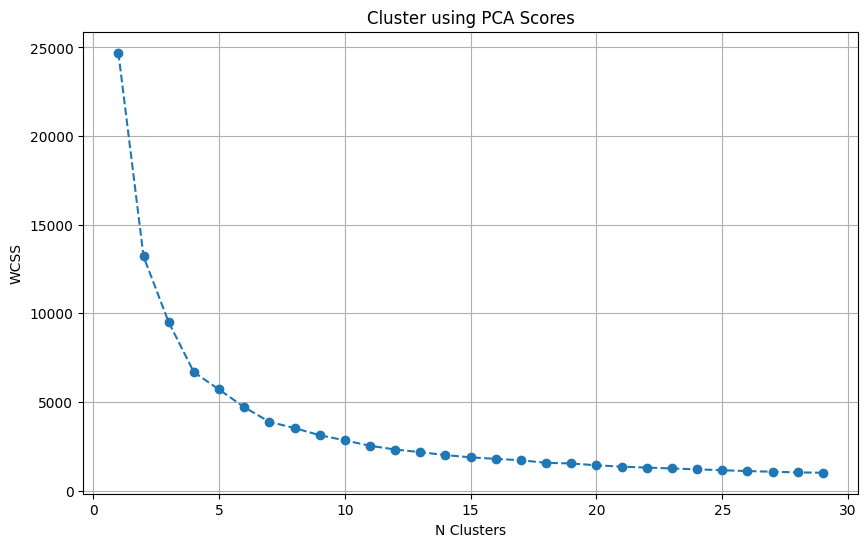

In [155]:
plt.figure(figsize = (10,6))
plt.plot(range(1,30), WCSS, marker = "o", linestyle = "--")
plt.grid()
plt.title("Cluster using PCA Scores")
plt.ylabel("WCSS")
plt.xlabel("N Clusters")
plt.show()

In [156]:
kmeans_pca = KMeans(n_clusters=2,init='k-means++')

In [157]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=2)

In [158]:
df_pca_kmeans = df_moons.copy()

In [159]:
df_pca_kmeans["kmeans_pca"] = kmeans_pca.labels_

In [160]:
df_pca_kmeans

,vab_1,vab_2,vab_3,vab_4,vab_5,vab_6,vab_7,vab_8,vab_9,vab_10,target,k_means,kmeans_pca
0,0.455493,-0.125503,0.049671,-0.013826,0.064769,0.152303,-0.023415,-0.023414,0.157921,0.076743,1,1,1
1,-0.704217,0.041308,-0.046947,0.054256,-0.046342,-0.046573,0.024196,-0.191328,-0.172492,-0.056229,0,0,0
2,0.413799,0.791322,-0.101283,0.031425,-0.090802,-0.141230,0.146565,-0.022578,0.006753,-0.142475,0,0,0
3,-0.864049,0.138754,-0.054438,0.011092,-0.115099,0.037570,-0.060064,-0.029169,-0.060171,0.185228,0,0,0
4,-0.936268,0.359267,-0.001350,-0.105771,0.082254,-0.122084,0.020886,-0.195967,-0.132819,0.019686,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.179911,0.138552,-0.127570,0.179582,0.036738,-0.027876,-0.025167,0.027819,0.200274,0.154656,1,0,0
9996,0.052471,0.474023,-0.026886,0.009416,0.014441,-0.195183,-0.023042,0.021013,-0.090781,0.172708,1,0,0
9997,-0.038031,0.245408,-0.112582,-0.101525,0.069162,0.027878,-0.045237,0.100722,0.024377,0.184915,1,0,0
9998,0.869802,0.523295,-0.177846,-0.052173,0.165432,0.048045,-0.010525,-0.040348,0.034982,-0.114482,0,0,0


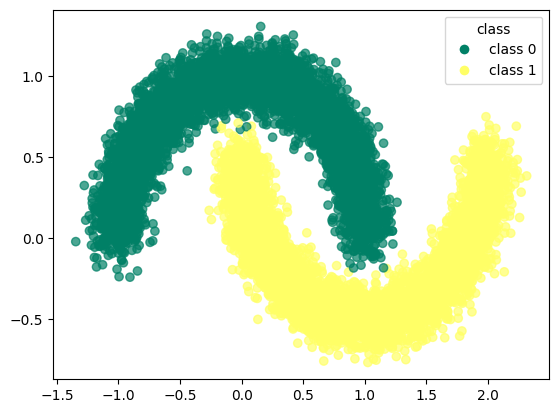

In [161]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

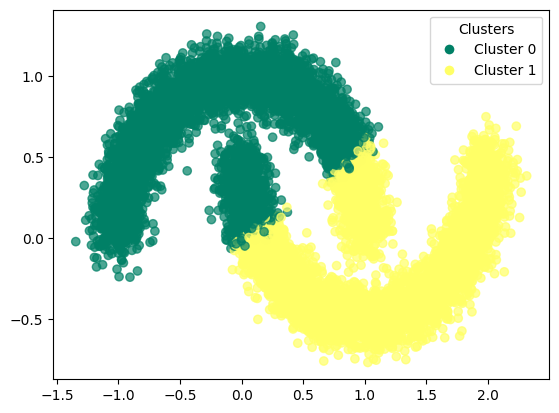

In [162]:
scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [163]:
y_true = df_pca_kmeans['target'].values  
y_kmeans = df_pca_kmeans['kmeans_pca'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_pca_kmeans['kmeans_pca'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_pca_kmeans['kmeans_pca'] == y_true))

accuracy before: 0.848
accuracy after: 0.848


In [164]:
df_pca_kmeans

,vab_1,vab_2,vab_3,vab_4,vab_5,vab_6,vab_7,vab_8,vab_9,vab_10,target,k_means,kmeans_pca
0,0.455493,-0.125503,0.049671,-0.013826,0.064769,0.152303,-0.023415,-0.023414,0.157921,0.076743,1,1,1
1,-0.704217,0.041308,-0.046947,0.054256,-0.046342,-0.046573,0.024196,-0.191328,-0.172492,-0.056229,0,0,0
2,0.413799,0.791322,-0.101283,0.031425,-0.090802,-0.141230,0.146565,-0.022578,0.006753,-0.142475,0,0,0
3,-0.864049,0.138754,-0.054438,0.011092,-0.115099,0.037570,-0.060064,-0.029169,-0.060171,0.185228,0,0,0
4,-0.936268,0.359267,-0.001350,-0.105771,0.082254,-0.122084,0.020886,-0.195967,-0.132819,0.019686,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.179911,0.138552,-0.127570,0.179582,0.036738,-0.027876,-0.025167,0.027819,0.200274,0.154656,1,0,0
9996,0.052471,0.474023,-0.026886,0.009416,0.014441,-0.195183,-0.023042,0.021013,-0.090781,0.172708,1,0,0
9997,-0.038031,0.245408,-0.112582,-0.101525,0.069162,0.027878,-0.045237,0.100722,0.024377,0.184915,1,0,0
9998,0.869802,0.523295,-0.177846,-0.052173,0.165432,0.048045,-0.010525,-0.040348,0.034982,-0.114482,0,0,0


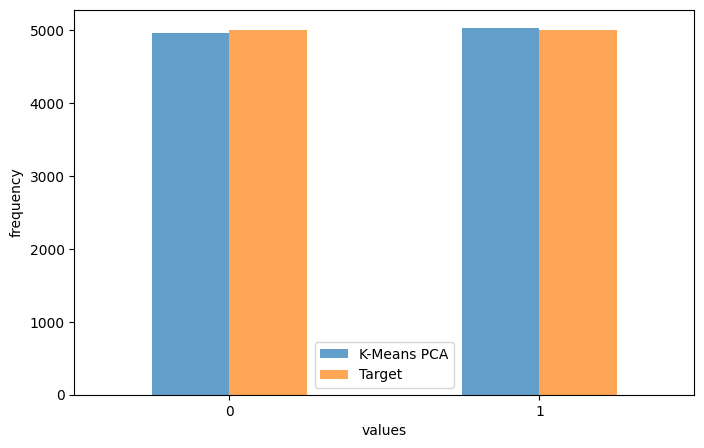

In [165]:
counts_kmeans = df_pca_kmeans['kmeans_pca'].value_counts().sort_index()
counts_target = df_pca_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means PCA': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means PCA", "Target"])
plt.xticks(rotation=0)  
plt.show()


In [166]:
print(confusion_matrix(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

[[4224  776]
 [ 744 4256]]


In [167]:
print(classification_report(df_moons['target'],df_moons['k_means']))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      5000
           1       0.85      0.85      0.85      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [168]:
print(classification_report(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      5000
           1       0.85      0.85      0.85      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



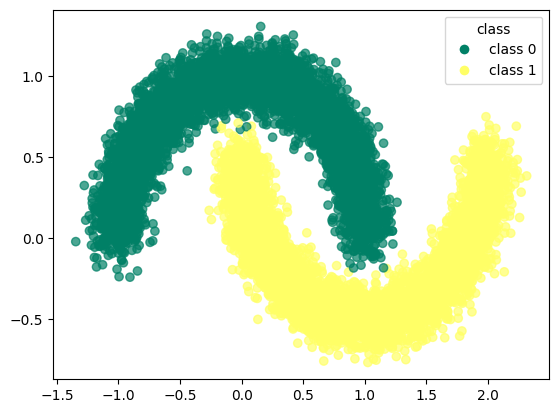

In [169]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

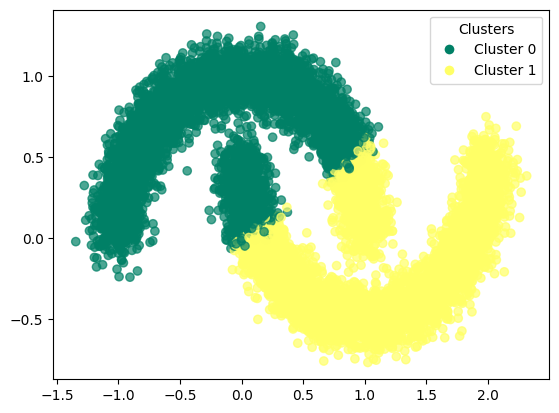

In [170]:
scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

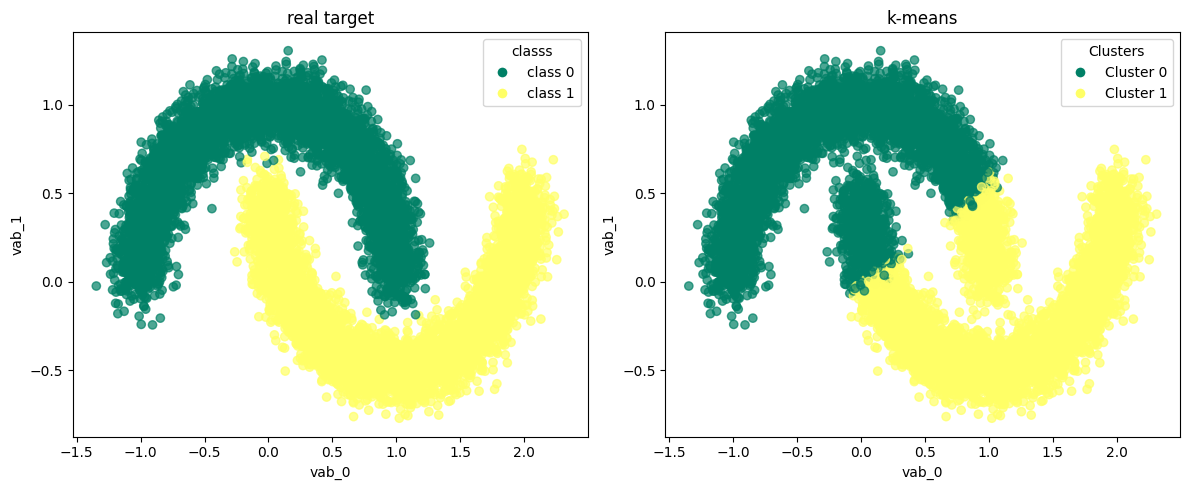

In [171]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                           c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                           c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

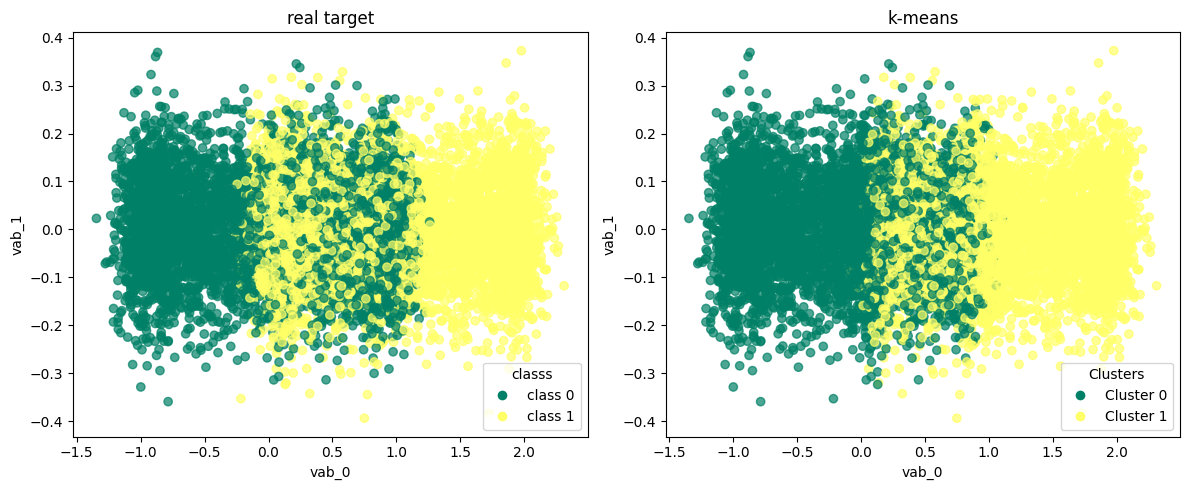

In [172]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 2], 
                           c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 2], 
                           c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

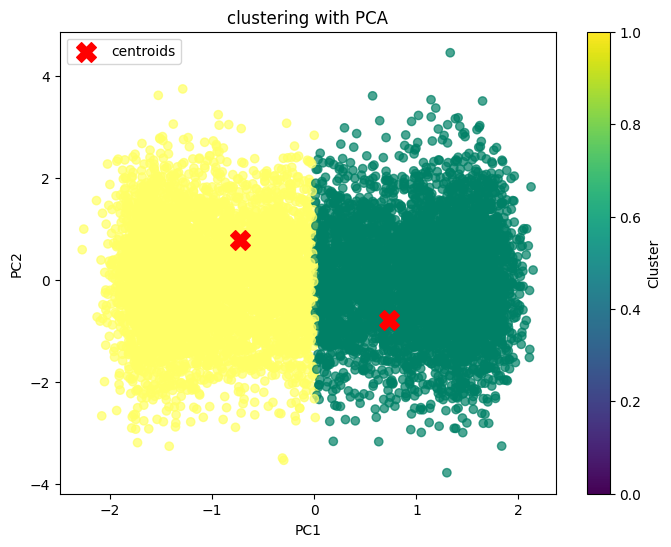

In [173]:
plt.figure(figsize=(8, 6))
plt.scatter(final_df['principal component 1'], final_df['principal component 2'] , c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='centroids')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('clustering with PCA')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

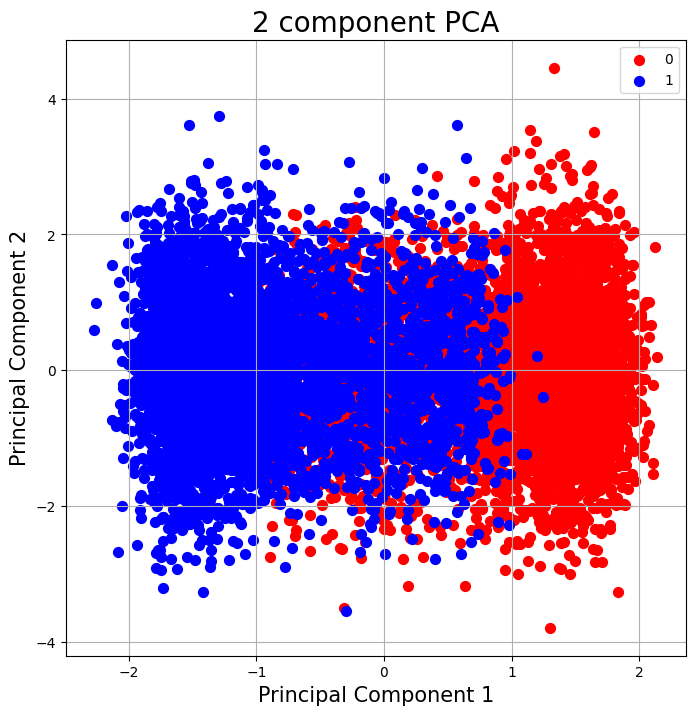

In [174]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1',fontsize = 15)
ax.set_ylabel('Principal Component 2',fontsize = 15)
ax.set_title('2 component PCA',fontsize = 20)

targets = [0,1]
colors = ['r','b']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               ,final_df.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(targets)
ax.grid()

### clustering with t-SNE

In [175]:
kmeans_tsne = KMeans(n_clusters=2,init='k-means++')

In [176]:
kmeans_tsne.fit(X_tsne)

KMeans(n_clusters=2)

In [177]:
df_tsne_kmeans = df_moons.copy()

In [178]:
df_tsne_kmeans['kmeans_tsne'] = kmeans_tsne.labels_

In [179]:
df_tsne_kmeans

,vab_1,vab_2,vab_3,vab_4,vab_5,vab_6,vab_7,vab_8,vab_9,vab_10,target,k_means,kmeans_tsne
0,0.455493,-0.125503,0.049671,-0.013826,0.064769,0.152303,-0.023415,-0.023414,0.157921,0.076743,1,1,1
1,-0.704217,0.041308,-0.046947,0.054256,-0.046342,-0.046573,0.024196,-0.191328,-0.172492,-0.056229,0,0,0
2,0.413799,0.791322,-0.101283,0.031425,-0.090802,-0.141230,0.146565,-0.022578,0.006753,-0.142475,0,0,0
3,-0.864049,0.138754,-0.054438,0.011092,-0.115099,0.037570,-0.060064,-0.029169,-0.060171,0.185228,0,0,0
4,-0.936268,0.359267,-0.001350,-0.105771,0.082254,-0.122084,0.020886,-0.195967,-0.132819,0.019686,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.179911,0.138552,-0.127570,0.179582,0.036738,-0.027876,-0.025167,0.027819,0.200274,0.154656,1,0,0
9996,0.052471,0.474023,-0.026886,0.009416,0.014441,-0.195183,-0.023042,0.021013,-0.090781,0.172708,1,0,0
9997,-0.038031,0.245408,-0.112582,-0.101525,0.069162,0.027878,-0.045237,0.100722,0.024377,0.184915,1,0,0
9998,0.869802,0.523295,-0.177846,-0.052173,0.165432,0.048045,-0.010525,-0.040348,0.034982,-0.114482,0,0,0


In [180]:
y_true = df_tsne_kmeans['target'].values  
y_kmeans = df_tsne_kmeans['kmeans_tsne'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_tsne_kmeans['kmeans_tsne'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_tsne_kmeans['kmeans_tsne'] == y_true))

accuracy before: 0.8954
accuracy after: 0.8954


In [181]:
df_tsne_kmeans

,vab_1,vab_2,vab_3,vab_4,vab_5,vab_6,vab_7,vab_8,vab_9,vab_10,target,k_means,kmeans_tsne
0,0.455493,-0.125503,0.049671,-0.013826,0.064769,0.152303,-0.023415,-0.023414,0.157921,0.076743,1,1,1
1,-0.704217,0.041308,-0.046947,0.054256,-0.046342,-0.046573,0.024196,-0.191328,-0.172492,-0.056229,0,0,0
2,0.413799,0.791322,-0.101283,0.031425,-0.090802,-0.141230,0.146565,-0.022578,0.006753,-0.142475,0,0,0
3,-0.864049,0.138754,-0.054438,0.011092,-0.115099,0.037570,-0.060064,-0.029169,-0.060171,0.185228,0,0,0
4,-0.936268,0.359267,-0.001350,-0.105771,0.082254,-0.122084,0.020886,-0.195967,-0.132819,0.019686,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.179911,0.138552,-0.127570,0.179582,0.036738,-0.027876,-0.025167,0.027819,0.200274,0.154656,1,0,0
9996,0.052471,0.474023,-0.026886,0.009416,0.014441,-0.195183,-0.023042,0.021013,-0.090781,0.172708,1,0,0
9997,-0.038031,0.245408,-0.112582,-0.101525,0.069162,0.027878,-0.045237,0.100722,0.024377,0.184915,1,0,0
9998,0.869802,0.523295,-0.177846,-0.052173,0.165432,0.048045,-0.010525,-0.040348,0.034982,-0.114482,0,0,0


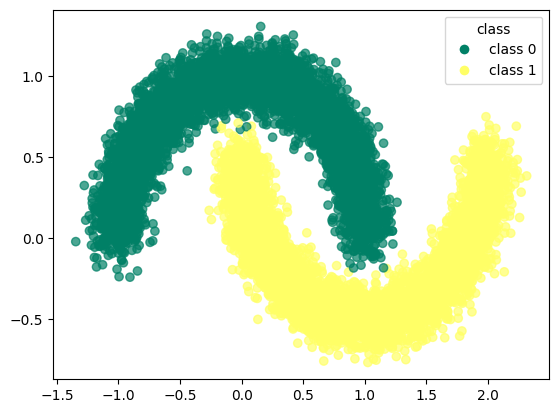

In [182]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_tsne_kmeans.iloc[:, 0], df_tsne_kmeans.iloc[:, 1], 
                      c=df_tsne_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_tsne_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

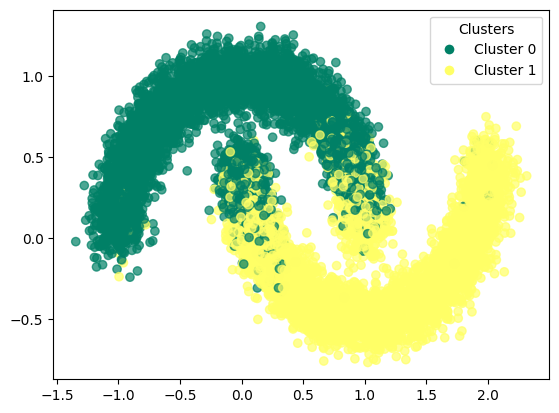

In [183]:
scatter = plt.scatter(df_tsne_kmeans.iloc[:, 0], df_tsne_kmeans.iloc[:, 1], 
                      c=df_tsne_kmeans['kmeans_tsne'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_tsne_kmeans['kmeans_tsne'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

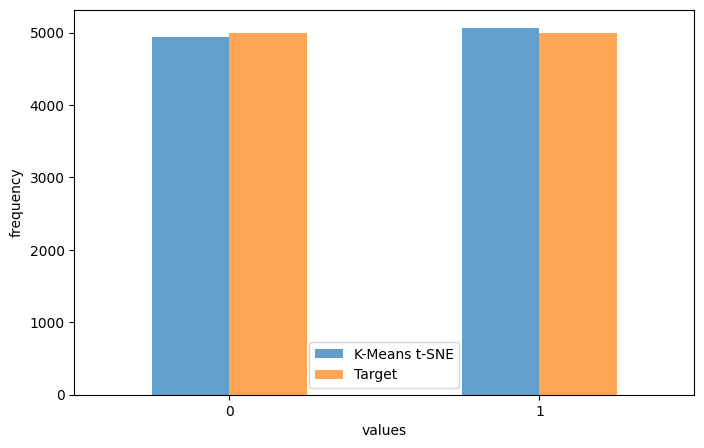

In [184]:
counts_kmeans = df_tsne_kmeans['kmeans_tsne'].value_counts().sort_index()
counts_target = df_tsne_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means t-SNE': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar',figsize=(8, 5),alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means t-SNE", "Target"])
plt.xticks(rotation=0)  
plt.show()

In [185]:
print(confusion_matrix(df_tsne_kmeans['target'],df_tsne_kmeans['kmeans_tsne']))

[[4446  554]
 [ 492 4508]]


# overall results

In [186]:
print(classification_report(df_tsne_kmeans['target'],df_tsne_kmeans['kmeans_tsne'])) 

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      5000
           1       0.89      0.90      0.90      5000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [187]:
print(classification_report(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      5000
           1       0.85      0.85      0.85      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [188]:
print(classification_report(df_moons['target'],df_moons['k_means']))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      5000
           1       0.85      0.85      0.85      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

